In [1]:
get_ipython().system('pip install google-cloud-bigquery')
get_ipython().system('pip install google-cloud-bigquery[pandas]')
get_ipython().system('python3 -m pip install google.cloud')
get_ipython().system('python3 -m pip install pandas')
get_ipython().system('python3 -m pip install numpy')
get_ipython().system('python3 -m pip install scikit-learn')
get_ipython().system('python3 -m pip install plotly')

zsh:1: no matches found: google-cloud-bigquery[pandas]


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
import csv
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt  
import os
import seaborn as sns
from pandas import Series, DataFrame

In [3]:
import csv
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt  
import os
import seaborn as sns
from pandas import Series, DataFrame

In [4]:
get_ipython().run_cell_magic('capture', '', "%logstop\n%logstart -t -r -q ipython_command_log.py global\n\n#- IRONHACKS RESEARCH TRACKING CODE\n#----------------------------------\n# The following code is used to help our research team understand how you \n# our notebook environment. We do not collect any personal information with\n# the following code, it is used to measure when and how often you work on\n# your submission files.\n\nimport os\nfrom datetime import datetime\nimport IPython.core.history as history\n\nha = history.HistoryAccessor()\nha_tail = ha.get_tail(1)\nha_cmd = next(ha_tail)\nsession_id = str(ha_cmd[0])\ncommand_id = str(ha_cmd[1])\ntimestamp = datetime.utcnow().isoformat()\nhistory_line = ','.join([session_id, command_id, timestamp]) + '\\n'\nlogfile = open(os.environ['HOME']+'/ipython_session_log.csv', 'a')\nlogfile.write(history_line)\nlogfile.close()\n")

In [5]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [6]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [7]:
# QUERY THE DATA ONCE
query_job = bigquery_client.query(query)
unemployment_data = query_job.to_dataframe()
unemployment_data.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,76,35,0,0,0,<NA>,<NA>,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,39,0,0,0,0
3,46b2882ec4c373527ec33f7bd4f1388d,20220716,29,18089,20700,"Census Tract 207, Lake County, Indiana",14,0,<NA>,<NA>,...,<NA>,<NA>,0,0,<NA>,10,0,0,<NA>,<NA>
4,37495d17e82f7df326bfc2c4c090f7b7,20220409,15,18089,21900,"Census Tract 219, Lake County, Indiana",155,0,<NA>,69,...,90,65,0,0,0,135,<NA>,<NA>,<NA>,<NA>


In [8]:
query2 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.wage_data`
"""

In [9]:
# QUERY THE DATA ONCE
query_job2 = bigquery_client.query(query2)
wage_data = query_job2.to_dataframe()
wage_data.head()

,uu_id,countyfips,tract,tract_name,average_wage
0,585f8731c2255d6b3f817a31180848b9,18177,200,"Census Tract 2, Wayne County, Indiana",6612.000000
1,8c9d2aa90948679972a9382aadcc6001,18177,900,"Census Tract 9, Wayne County, Indiana",9883.250000
2,0f3d45341a5b113b813ffb7be7f58bab,18183,50300,"Census Tract 503, Whitley County, Indiana",13992.250000
3,fb55464f8e34af6d750d06968bf719b8,18183,50400,"Census Tract 504, Whitley County, Indiana",13613.500000
4,983badfd7b568728e39a2344a9006078,18001,30200,"Census Tract 302, Adams County, Indiana",11816.666667


In [10]:
wage_data[wage_data.isnull().any(axis=1)]

,uu_id,countyfips,tract,tract_name,average_wage


In [11]:
wage_data2 = wage_data.fillna({'average_wage': wage_data.average_wage.mean()})
wage_data2.head()

,uu_id,countyfips,tract,tract_name,average_wage
0,585f8731c2255d6b3f817a31180848b9,18177,200,"Census Tract 2, Wayne County, Indiana",6612.000000
1,8c9d2aa90948679972a9382aadcc6001,18177,900,"Census Tract 9, Wayne County, Indiana",9883.250000
2,0f3d45341a5b113b813ffb7be7f58bab,18183,50300,"Census Tract 503, Whitley County, Indiana",13992.250000
3,fb55464f8e34af6d750d06968bf719b8,18183,50400,"Census Tract 504, Whitley County, Indiana",13613.500000
4,983badfd7b568728e39a2344a9006078,18001,30200,"Census Tract 302, Adams County, Indiana",11816.666667


In [12]:
query3 = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [13]:
# QUERY THE DATA ONCE
query_job3 = bigquery_client.query(query3)
prediction_list = query_job3.to_dataframe()
prediction_list.head()

,uu_id,week_number
0,5bf51fc2e162d6faf9e3cf79e4198378,44
1,420b44cc7e3f55d738df565421e59941,44
2,e39c66ecceec76ee8f9f811fa4a2d246,44
3,a90462cd11ae4e43144239bf7c4828a4,44
4,8b20a6749088c7ff1237983076ebfeaa,44


In [14]:
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.INFORMATION_SCHEMA.TABLES`
"""

In [15]:
# QUERY THE DATA ONCE
query_job = bigquery_client.query(query)
data = query_job.to_dataframe()
data.head()

,table_catalog,table_schema,table_name,table_type,is_insertable_into,is_typed,creation_time,base_table_catalog,base_table_schema,base_table_name,snapshot_time_ms,ddl,default_collation_name,upsert_stream_apply_watermark
0,ironhacks-data,ironhacks_competition,wage_data,BASE TABLE,YES,NO,2022-11-29 17:00:10.578000+00:00,None,None,None,NaT,CREATE TABLE `ironhacks-data.ironhacks_competi...,NULL,NaT
1,ironhacks-data,ironhacks_competition,prediction_list,BASE TABLE,YES,NO,2022-11-29 17:00:10.722000+00:00,None,None,None,NaT,CREATE TABLE `ironhacks-data.ironhacks_competi...,NULL,NaT
2,ironhacks-data,ironhacks_competition,unemployment_data,BASE TABLE,YES,NO,2022-11-29 17:00:14.588000+00:00,None,None,None,NaT,CREATE TABLE `ironhacks-data.ironhacks_competi...,NULL,NaT


In [16]:
#Merge the data
unemployment_wage_data = pd.merge(unemployment_data, wage_data, on=['uu_id'], how='inner')
unemployment_wage_data = unemployment_wage_data.drop(['countyfips_y', 'tract_y', 'tract_name_y'], axis=1)
unemployment_wage_data = unemployment_wage_data.fillna(0)
unemployment_wage_data.describe()

,timeperiod,week_number,countyfips_x,tract_x,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage
count,16833.0,16833.0,16833.0,16833.0,16833.0,16833.0,16833.0,16833.0,16833.0,16833.0,...,16833.0,16833.0,16833.0,16833.0,16833.0,16833.0,16833.0,16833.0,16833.0,16833.000000
mean,20220540.093329,21.329531,18088.919682,211605.900315,22.952712,0.041644,0.455771,6.927642,3.263471,0.094339,...,4.597992,0.005228,0.009921,0.012475,4.544526,0.124161,0.0,0.241965,6.57417,11695.354680
std,268.366832,11.618554,41.019467,288715.02492,14.583655,0.953462,3.220428,11.931776,8.21234,1.499568,...,10.175552,0.441002,0.469947,0.535979,11.640663,1.947116,0.0,2.336547,11.040787,4123.648325
min,20220101.0,1.0,18001.0,100.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3992.500000
25%,20220312.0,11.0,18063.0,10100.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8807.166667
50%,20220528.0,22.0,18095.0,42801.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11045.000000
75%,20220806.0,32.0,18103.0,342600.0,27.0,0.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,13908.333333
max,20220910.0,37.0,18183.0,976400.0,170.0,41.0,78.0,137.0,154.0,60.0,...,139.0,49.0,36.0,41.0,163.0,110.0,0.0,74.0,155.0,41267.000000


In [17]:
unemployment_wage_data.head()

,uu_id,timeperiod,week_number,countyfips_x,tract_x,tract_name_x,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,0,14,...,0,0,0,0,11,0,0,0,0,8347.125
1,f013068de98db1470bd986137a0c6d23,20220212,7,18003,900,"Census Tract 9, Allen County, Indiana",10,0,0,0,...,0,0,0,0,0,0,0,0,0,8347.125
2,f013068de98db1470bd986137a0c6d23,20220827,35,18003,900,"Census Tract 9, Allen County, Indiana",11,0,0,0,...,0,0,0,0,0,0,0,0,0,8347.125
3,f013068de98db1470bd986137a0c6d23,20220312,11,18003,900,"Census Tract 9, Allen County, Indiana",11,0,0,0,...,0,0,0,0,0,0,0,0,0,8347.125
4,f013068de98db1470bd986137a0c6d23,20220205,6,18003,900,"Census Tract 9, Allen County, Indiana",11,0,0,0,...,0,0,0,0,0,0,0,0,0,8347.125


In [18]:
#Check for duplicated rows
duplicated_rows = sum(unemployment_wage_data.duplicated()) 
unemployment_wage_data = unemployment_wage_data.drop_duplicates()

In [19]:
unemployment_wage_data[unemployment_wage_data.isnull().any(axis=1)]

,uu_id,timeperiod,week_number,countyfips_x,tract_x,tract_name_x,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage


/var/folders/l2/cnhff0_n1470l4xf0p7v7l_40000gn/T/ipykernel_16340/2916312454.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = unemployment_wage_data.corr()


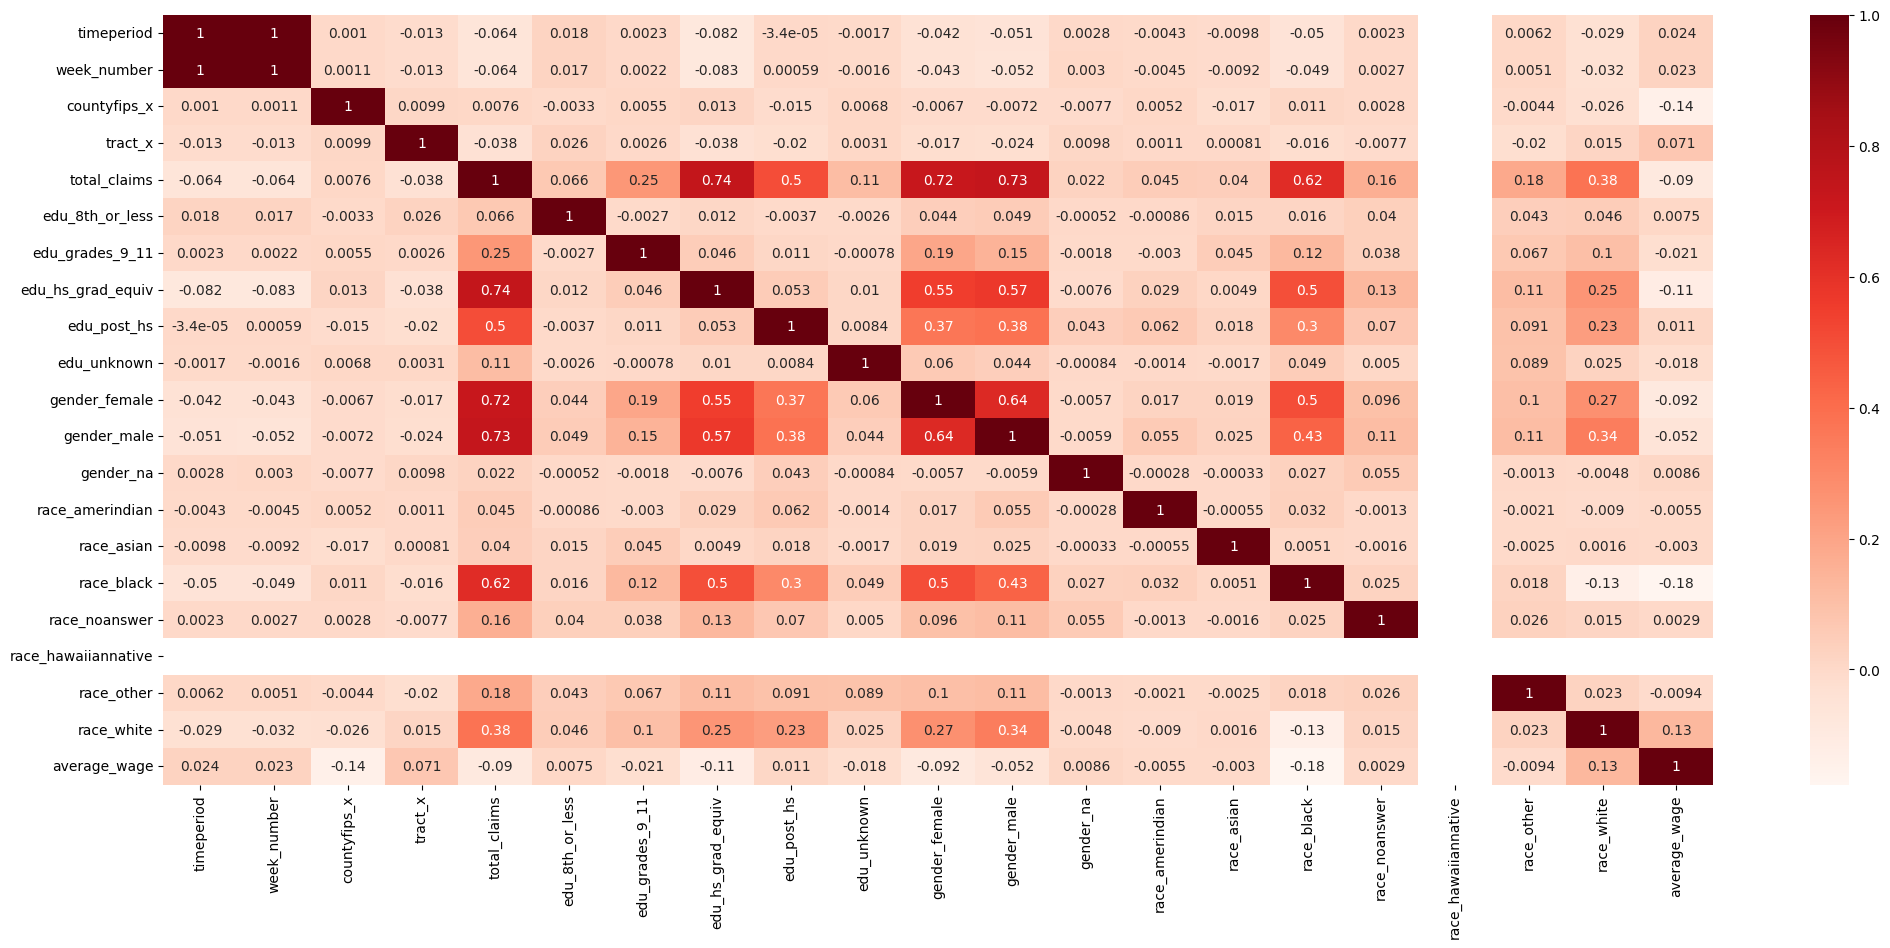

In [20]:
#heat map for correlations
plt.figure(figsize=(25,10))
cor = unemployment_wage_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds) 
plt.show()

In [21]:
unemployment_wage_data.columns

Index(['uu_id', 'timeperiod', 'week_number', 'countyfips_x', 'tract_x',
       'tract_name_x', 'total_claims', 'edu_8th_or_less', 'edu_grades_9_11',
       'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_hawaiiannative', 'race_other', 'race_white', 'average_wage'],
      dtype='object')

In [22]:
unemployment_wage_data.dtypes

uu_id                      object
timeperiod                  Int64
week_number                 Int64
countyfips_x                Int64
tract_x                     Int64
tract_name_x               object
total_claims                Int64
edu_8th_or_less             Int64
edu_grades_9_11             Int64
edu_hs_grad_equiv           Int64
edu_post_hs                 Int64
edu_unknown                 Int64
top_category_employer1     object
top_category_employer2     object
top_category_employer3     object
gender_female               Int64
gender_male                 Int64
gender_na                   Int64
race_amerindian             Int64
race_asian                  Int64
race_black                  Int64
race_noanswer               Int64
race_hawaiiannative         Int64
race_other                  Int64
race_white                  Int64
average_wage              float64
dtype: object

In [23]:
X = unemployment_wage_data.drop(['total_claims', 'week_number'], axis = 1)
y = unemployment_wage_data.total_claims

In [24]:
uuid, label = unemployment_wage_data['uu_id'].factorize(sort=True)

In [25]:
X['uu_id'] = uuid

In [26]:
X['tract_name_x'] = X['tract_name_x'].factorize()[0]
X['top_category_employer1'] = X['top_category_employer1'].factorize()[0]
X['top_category_employer2'] = X['top_category_employer2'].factorize()[0]
X['top_category_employer3'] = X['top_category_employer3'].factorize()[0]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [29]:
rf.score(X_test, y_test)

0.9275043302939682

In [30]:
prediction_list

,uu_id,week_number
0,5bf51fc2e162d6faf9e3cf79e4198378,44
1,420b44cc7e3f55d738df565421e59941,44
2,e39c66ecceec76ee8f9f811fa4a2d246,44
3,a90462cd11ae4e43144239bf7c4828a4,44
4,8b20a6749088c7ff1237983076ebfeaa,44
...,...,...
520,46c4f6c75e663b1ca82ea7994e6d83d3,44
521,1deebda501712e7595b531b8337bc31a,44
522,5a9758f65f001b6432ff31ff64a459d7,44
523,e8b3b95e93a6dc7dbb90f4e72e7ac065,44


In [31]:
X['uu_id'] = label[X["uu_id"]]
X

,uu_id,timeperiod,countyfips_x,tract_x,tract_name_x,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage
0,f013068de98db1470bd986137a0c6d23,20220416,18003,900,0,0,0,14,0,0,...,0,0,0,0,11,0,0,0,0,8347.125000
1,f013068de98db1470bd986137a0c6d23,20220212,18003,900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8347.125000
2,f013068de98db1470bd986137a0c6d23,20220827,18003,900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8347.125000
3,f013068de98db1470bd986137a0c6d23,20220312,18003,900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8347.125000
4,f013068de98db1470bd986137a0c6d23,20220205,18003,900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8347.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,33f8f477e670b3cac704f4c0faa6e318,20220305,18113,971900,524,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17282.764706
16829,33f8f477e670b3cac704f4c0faa6e318,20220205,18113,971900,524,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17282.764706
16830,33f8f477e670b3cac704f4c0faa6e318,20220730,18113,971900,524,0,0,10,0,0,...,0,0,0,0,0,0,0,0,0,17282.764706
16831,33f8f477e670b3cac704f4c0faa6e318,20220226,18113,971900,524,0,0,19,0,0,...,0,0,0,0,0,0,0,0,0,17282.764706


In [32]:
for col in X.columns[2:]:
    li = []
    for i in prediction_list['uu_id']:
        li.append(X.loc[X['uu_id'] == i, col].mean())
    prediction_list[col] = li
prediction_list

,uu_id,week_number,countyfips_x,tract_x,tract_name_x,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage
0,5bf51fc2e162d6faf9e3cf79e4198378,44,18103.0,952800.0,514.0,0.0,0.000000,1.375000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,3.500000,5008.500000
1,420b44cc7e3f55d738df565421e59941,44,18043.0,70400.0,142.0,0.0,1.750000,0.000000,1.500000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,3.375000,9019.666667
2,e39c66ecceec76ee8f9f811fa4a2d246,44,18099.0,20500.0,268.0,0.0,0.000000,0.909091,1.090909,0.000000,...,2.181818,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.545455,8928.000000
3,a90462cd11ae4e43144239bf7c4828a4,44,18153.0,50300.0,276.0,0.0,0.384615,7.846154,3.307692,0.000000,...,6.461538,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,17.576923,10040.857143
4,8b20a6749088c7ff1237983076ebfeaa,44,18071.0,967902.0,407.0,0.0,0.000000,2.545455,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,5.727273,9013.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,46c4f6c75e663b1ca82ea7994e6d83d3,44,18141.0,11602.0,80.0,0.0,0.870968,8.838710,1.000000,0.322581,...,5.645161,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,8.741935,14125.320000
521,1deebda501712e7595b531b8337bc31a,44,18141.0,11406.0,426.0,0.0,0.000000,1.857143,0.750000,0.000000,...,0.357143,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.571429,11725.307692
522,5a9758f65f001b6432ff31ff64a459d7,44,18003.0,11603.0,265.0,0.0,1.043478,0.000000,3.173913,0.000000,...,2.608696,0.0,0.0,0.0,1.043478,0.0,0.0,0.0,7.260870,41267.000000
523,e8b3b95e93a6dc7dbb90f4e72e7ac065,44,18073.0,100901.0,325.0,0.0,0.000000,3.500000,1.400000,0.000000,...,1.800000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.350000,10922.857143


In [33]:
prediction_list['uu_id'] = prediction_list['uu_id'].factorize(sort=True)[0]

In [34]:
claims_predict = rf.predict(prediction_list)
claims_predict

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- week_number
Feature names seen at fit time, yet now missing:
- timeperiod


In [35]:
submission_df = pd.DataFrame()

In [36]:
submission_df["uu_id"] = prediction_list["uu_id"]
submission_df["week_number"] = prediction_list["week_number"]
submission_df["total_claims"] = claims_predict

NameError: name 'claims_predict' is not defined

In [37]:
submission_df

,uu_id,week_number
0,198,44
1,126,44
2,476,44
3,353,44
4,288,44
...,...,...
520,144,44
521,52,44
522,192,44
523,486,44


In [38]:
submission_df["uu_id"] = label[submission_df["uu_id"]]

In [39]:
submission_df.to_csv('submission2_prediction_output.csv', index=False)